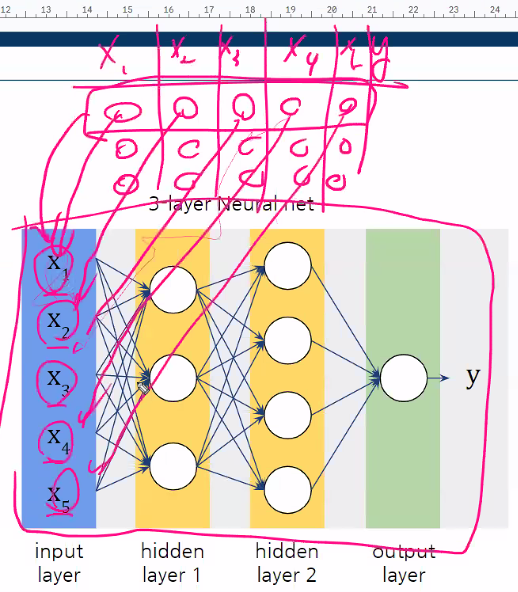

In [2]:
import torch

In [3]:
# gpu 확인
torch.cuda.is_available()

True

In [4]:
# 모델 만들기 위해
import torch.nn as nn

# 모델 만들기
1. nn.Sequential로 만들기
2. nn.Module을 상속받는 클래스 만들기

# 1. nn.Sequential로 만들기
- 순차적으로 쌓아서 만드는 방법
- 간단한 모델을 만들 때 사용
- 신경망 아키텍처 구성

In [5]:
# 선형으로 = fully connected
model = nn.Sequential(
    nn.Linear(4,128),     # 인풋은 4개(데이터의 피처가 4개) 아웃풋은 128개
    nn.ReLU(),            # 128개 모두에 활성화 함수 거침
    nn.Linear(128,64),    # 인풋은 128개 아웃풋은 64
    nn.ReLU(),            # 64개 모두에 활성화 함수 거침
    nn.Linear(64,1)       # 인풋은 64개 아웃풋은 1개        
)

이진분류는 아웃풋 레이어가 1개여야 한다

In [6]:
# model 확인
model

Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

In [7]:
# 모델이 가진 파라미터 뽑을 수 있음
model.parameters()

<generator object Module.parameters at 0x0000015E58B3BCA0>

In [11]:
# 리스트로 바꿈
list(model.parameters())

[Parameter containing:
 tensor([[-0.2756,  0.2185, -0.0182, -0.0362],
         [-0.0448, -0.1515, -0.3992, -0.4459],
         [ 0.2185,  0.4719, -0.1996, -0.0532],
         [-0.3046, -0.3304,  0.1775, -0.1582],
         [-0.3461, -0.2058, -0.3546, -0.1810],
         [-0.0707,  0.3983, -0.1535, -0.1512],
         [-0.2762,  0.1911,  0.1563,  0.0464],
         [-0.0029, -0.0772,  0.4840,  0.2503],
         [-0.0222, -0.3038, -0.4357, -0.0965],
         [ 0.0948,  0.0403,  0.4420,  0.3229],
         [ 0.3563, -0.1861, -0.1669,  0.2494],
         [-0.1524, -0.0230, -0.2347,  0.2313],
         [-0.2844, -0.0339, -0.4222, -0.0685],
         [ 0.3379, -0.1851, -0.3249,  0.0627],
         [ 0.4845,  0.2555,  0.0065,  0.2479],
         [ 0.2707,  0.0898, -0.4490, -0.4079],
         [ 0.2816,  0.3272,  0.1520,  0.3403],
         [ 0.1914, -0.0326, -0.0650,  0.4025],
         [ 0.3183,  0.2277, -0.3338, -0.1283],
         [-0.2662,  0.0462,  0.4689, -0.2359],
         [-0.4816,  0.1121,  0.0794, 

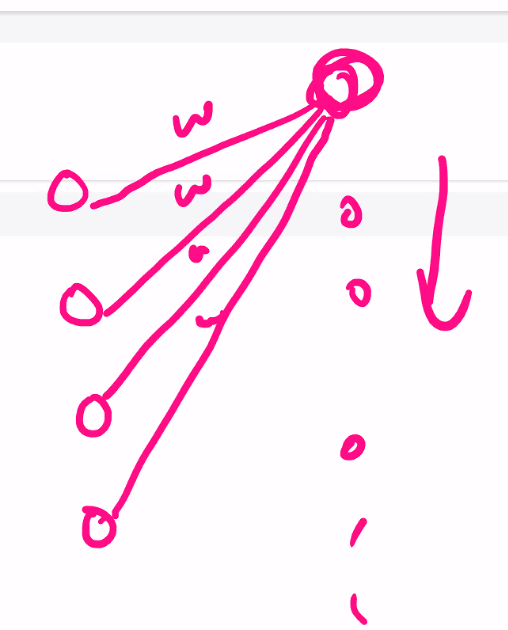

In [21]:
model.named_parameters

<bound method Module.named_parameters of Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)>

In [22]:
model[0]

Linear(in_features=4, out_features=128, bias=True)

In [12]:
# named_parameters(): 모델의 이름과 파라미터를 반환
for name, parm in model.named_parameters():
    print(name)
# 0, 2, 4번의 가중치와 편향 1,3은 활성화함수니까 가중치 필요 X

0.weight
0.bias
2.weight
2.bias
4.weight
4.bias


In [34]:
model[2].weight.shape

torch.Size([64, 128])

In [33]:
model[2].bias.shape

torch.Size([64])

# 2. nn.Module을 상속받는 클래스 만들기

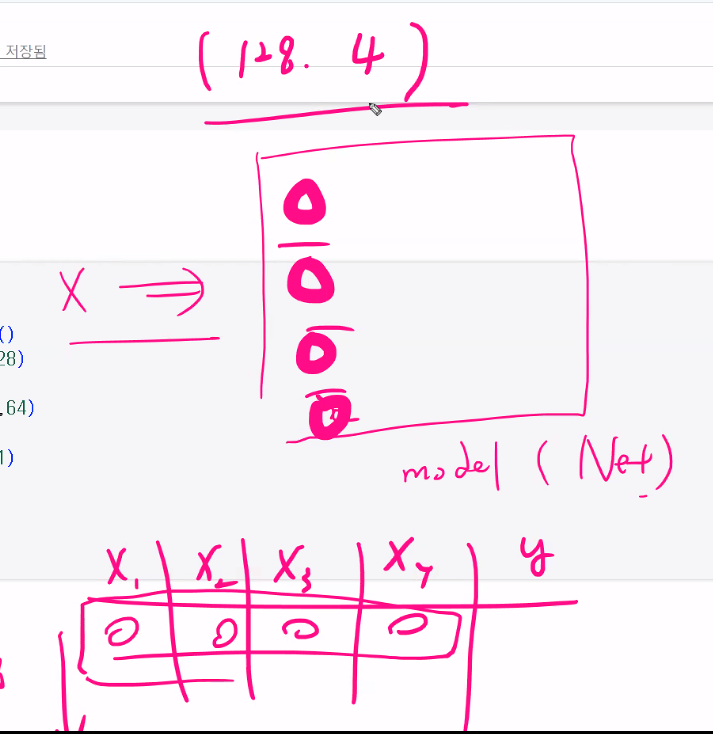  
인풋으로는 (배치 수, 인풋 레이어 퍼셉트론 수) 의 shape으로

In [35]:
## 위의 nn.sequential과 동일한 구조
# nn.Module 상속 받음. nn.Module의 기능을 내 것처럼 사용하겠다
class Net(nn.Module):
    # 생성자 만들기
    def __init__(self):
        # 부모 생성자도 한 번 호출
        super(Net, self).__init__()

        # 변수 쓸 거라고 선언만 한 상태
        self.fc1 = nn.Linear(4, 128)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    # 순전파
    def forward(self, x): # input 값 (배치 수, 인풋 레이어 퍼셉트론 수)
        x = self.fc1(x)
        x = self.fc1_act(x)
        x = self.fc2(x)
        x = self.fc2_act(x)
        x = self.fc3(x)
        return x # 에측된 값


In [36]:
model = Net()
model

Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [37]:
model.parameters

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)>

In [38]:
model.parameters()

<generator object Module.parameters at 0x0000015E59EF9620>

In [39]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.0643e-01,  4.3004e-01,  2.0299e-01, -1.0691e-01],
         [ 3.0616e-01, -1.2227e-01, -4.0447e-01, -2.5029e-01],
         [ 5.5572e-02,  1.0089e-01, -3.8440e-01, -1.9274e-01],
         [ 2.0364e-01,  8.8040e-03, -2.7880e-01,  4.5454e-01],
         [ 1.0153e-02,  4.5152e-01,  4.7731e-01, -2.9619e-01],
         [ 3.9672e-01,  2.3689e-01, -3.5329e-01, -3.6505e-01],
         [-3.9765e-01, -2.4667e-01,  1.2862e-02, -4.0260e-01],
         [ 3.5685e-01,  7.0996e-02,  3.7097e-01,  1.5932e-01],
         [ 1.0150e-01,  1.6630e-01, -4.9982e-01,  1.3365e-01],
         [ 1.6134e-01,  1.6134e-01, -1.9558e-01,  4.4973e-01],
         [-3.1140e-01, -9.9668e-02, -2.4255e-01,  1.5337e-01],
         [ 3.3839e-01,  7.4813e-02, -3.2584e-02, -4.7393e-01],
         [ 8.6496e-02, -3.2738e-01,  2.9807e-01,  4.5504e-01],
         [-2.9833e-01,  3.1617e-01, -1.0683e-01, -4.2756e-01],
         [ 8.1761e-02,  3.0805e-01, -3.1012e-01, -3.6931e-01],
         [ 1.4265e-01,  5.5207e-

In [40]:
model.named_parameters

<bound method Module.named_parameters of Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)>

In [41]:
model.named_parameters()

<generator object Module.named_parameters at 0x0000015E58DB5540>

In [42]:
model.parameters()

<generator object Module.parameters at 0x0000015E59EF8E40>

In [43]:
# 파라미터 이름 출력
for name, param in model.named_parameters():
    print(name)

fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [44]:
# 피처가 4개인 데이터 100개 넣어줌
data = torch.rand(100,4)
data

tensor([[0.5591, 0.5348, 0.0931, 0.6741],
        [0.8104, 0.1996, 0.0784, 0.2104],
        [0.7551, 0.2826, 0.6940, 0.4826],
        [0.0819, 0.6938, 0.3281, 0.1063],
        [0.7537, 0.0414, 0.6569, 0.5847],
        [0.6206, 0.5876, 0.5226, 0.2979],
        [0.8301, 0.2084, 0.9927, 0.9218],
        [0.4020, 0.2864, 0.8964, 0.8515],
        [0.6643, 0.4374, 0.2710, 0.5797],
        [0.1127, 0.8532, 0.9622, 0.2390],
        [0.2467, 0.9233, 0.6996, 0.8143],
        [0.8735, 0.4540, 0.4654, 0.8737],
        [0.9902, 0.9401, 0.9511, 0.1498],
        [0.0841, 0.1779, 0.4746, 0.7199],
        [0.6526, 0.0234, 0.4858, 0.6742],
        [0.7260, 0.7636, 0.1264, 0.4214],
        [0.4193, 0.2789, 0.7458, 0.9291],
        [0.5068, 0.6278, 0.9368, 0.0966],
        [0.6071, 0.5523, 0.3665, 0.4963],
        [0.6253, 0.2369, 0.1254, 0.5461],
        [0.0282, 0.4892, 0.1855, 0.1711],
        [0.0653, 0.3588, 0.7202, 0.6372],
        [0.8364, 0.6304, 0.5977, 0.7531],
        [0.0032, 0.3661, 0.0825, 0

In [46]:
# 100개의 결과가 나온다
len(model(data))

100

In [45]:
# 100개의 결과값
model(data)

tensor([[ 0.0024],
        [ 0.0210],
        [ 0.0440],
        [ 0.0066],
        [ 0.0602],
        [ 0.0114],
        [ 0.0708],
        [ 0.0699],
        [ 0.0110],
        [ 0.0253],
        [ 0.0214],
        [ 0.0212],
        [-0.0062],
        [ 0.0542],
        [ 0.0541],
        [-0.0086],
        [ 0.0642],
        [ 0.0366],
        [ 0.0104],
        [ 0.0240],
        [ 0.0236],
        [ 0.0525],
        [ 0.0197],
        [ 0.0436],
        [ 0.0921],
        [ 0.0284],
        [ 0.0334],
        [ 0.0157],
        [ 0.0138],
        [ 0.0435],
        [ 0.0410],
        [ 0.0320],
        [ 0.0092],
        [ 0.0220],
        [-0.0129],
        [ 0.0648],
        [ 0.0578],
        [ 0.0013],
        [ 0.0261],
        [-0.0030],
        [ 0.0283],
        [ 0.0651],
        [ 0.0393],
        [ 0.0389],
        [ 0.0067],
        [ 0.0524],
        [ 0.0302],
        [-0.0068],
        [ 0.0436],
        [ 0.0170],
        [ 0.0627],
        [ 0.0466],
        [-0.

# 피처가 4개인 iris 데이터로 실습

In [47]:
# 피처 4개
from sklearn.datasets import load_iris

load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [49]:
X = load_iris()['data'] # numpy 형태
print(type(X))
X = torch.tensor(X) # tensor로 바꾸기
print(type(X))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [50]:
X.shape

torch.Size([150, 4])

In [50]:
# PyTorch에서는 기본적으로 torch.tensor()를 사용하면 생성된 텐서의 데이터 타입이 torch.float64가 됩니다. 
# 반면, PyTorch 모델의 파라미터는 torch.float32로 초기화됩니다. 
# 이로 인해 입력 데이터와 모델 파라미터 간에 데이터 타입이 맞지 않아 오류가 발생할 수 있습니다.

# 타입 변환
xx = X.type(torch.float32)

In [45]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(32, 3) # 3개의 정답 

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc1_act(x)
        x = self.fc2(x)
        x = self.fc2_act(x)
        x = self.fc3(x)
        return x 

In [46]:
model = Net()

In [51]:
model(xx)

tensor([[ 2.7352e-02, -6.0405e-02,  4.8025e-01],
        [-4.8651e-03, -5.6668e-02,  4.7259e-01],
        [ 1.3067e-02, -6.3826e-02,  4.5872e-01],
        [-9.4637e-03, -5.3510e-02,  4.6535e-01],
        [ 3.2393e-02, -6.1988e-02,  4.7581e-01],
        [ 2.6580e-02, -5.4119e-02,  5.0468e-01],
        [ 1.3156e-02, -6.4731e-02,  4.5587e-01],
        [ 1.3115e-02, -5.4362e-02,  4.8218e-01],
        [-1.5179e-02, -5.6776e-02,  4.5227e-01],
        [-2.8505e-03, -5.1419e-02,  4.8148e-01],
        [ 3.5215e-02, -5.5723e-02,  4.9849e-01],
        [ 3.2831e-03, -5.0854e-02,  4.7856e-01],
        [-2.0244e-03, -5.4673e-02,  4.7332e-01],
        [ 1.7837e-02, -7.0037e-02,  4.3875e-01],
        [ 7.0290e-02, -7.3826e-02,  4.9838e-01],
        [ 7.0976e-02, -7.2422e-02,  5.0722e-01],
        [ 4.7047e-02, -7.9641e-02,  4.7447e-01],
        [ 2.1239e-02, -6.4751e-02,  4.7367e-01],
        [ 2.3101e-02, -4.9541e-02,  5.1588e-01],
        [ 3.5643e-02, -6.2836e-02,  4.8367e-01],
        [ 3.5851e-04

# Linear Model 만들기

In [70]:
X = torch.randn(100,1)
X *= 10
X

tensor([[ -6.4434],
        [ -2.6738],
        [  9.3137],
        [-18.0776],
        [ -6.3319],
        [ 31.8196],
        [ -3.5748],
        [  2.4559],
        [ -2.3731],
        [ -9.2868],
        [-13.5495],
        [  7.7683],
        [  2.4972],
        [  8.3535],
        [ 12.0008],
        [  8.7587],
        [ -5.8750],
        [  1.0440],
        [ -4.0872],
        [ -3.2668],
        [  6.6252],
        [  1.4996],
        [ -6.4125],
        [ -2.1791],
        [  4.4331],
        [ 12.6019],
        [  7.3002],
        [ -1.2847],
        [  0.2727],
        [  1.9305],
        [ -6.5152],
        [  3.9450],
        [  7.1862],
        [ -7.9783],
        [ 17.7711],
        [ -2.3488],
        [ -4.9247],
        [  5.6832],
        [-10.1813],
        [  1.5149],
        [ -9.0658],
        [ -0.9010],
        [ -2.4970],
        [ -1.4087],
        [  3.6089],
        [  0.9472],
        [ -5.9950],
        [  5.3115],
        [ -7.4396],
        [  3.7263],


In [71]:
y = X + torch.randn(100,1) # X 값에 무작위로 0~1 사이 값 넣기
y

tensor([[ -5.2879],
        [ -3.5263],
        [ 10.0384],
        [-17.7219],
        [ -5.0038],
        [ 31.6345],
        [ -3.1022],
        [  2.9711],
        [ -2.8813],
        [ -7.9990],
        [-14.3071],
        [  8.2934],
        [  4.0925],
        [  9.6554],
        [ 11.6212],
        [  8.0114],
        [ -6.0367],
        [  1.9213],
        [ -5.1575],
        [ -4.5694],
        [  6.3952],
        [  1.7197],
        [ -7.7440],
        [ -0.6281],
        [  4.3307],
        [ 12.3696],
        [  8.9259],
        [ -1.8595],
        [  0.1540],
        [  2.4793],
        [ -8.0470],
        [  4.2506],
        [  8.5683],
        [ -5.8943],
        [ 17.5043],
        [ -3.3132],
        [ -4.9817],
        [  5.7937],
        [ -9.1283],
        [  0.6854],
        [ -7.5324],
        [ -2.1376],
        [ -3.4903],
        [ -0.4336],
        [  3.3990],
        [  0.6451],
        [ -3.9854],
        [  4.9593],
        [ -5.2384],
        [  5.4916],


In [72]:
model

Net(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

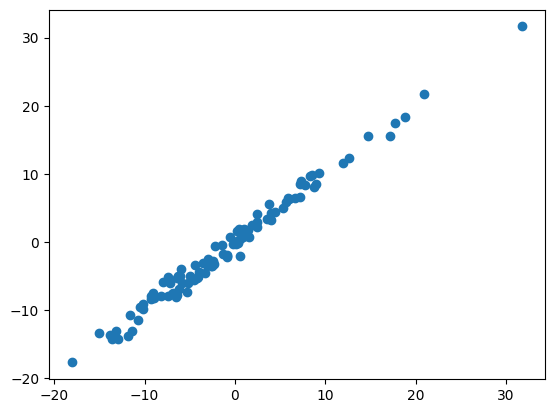

In [73]:
import matplotlib.pyplot as plt
import seaborn

plt.scatter(X,y)

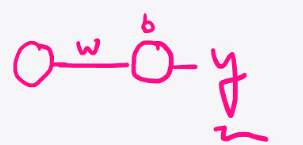

In [83]:
class LRModel(nn.Module):
    def __init__(self):
        super(LRModel, self).__init__()

        self.fc = nn.Linear(1,1)  # 1개 값을 넣으면 1개가 나온다
        
    def forward(self, x):
        x= self.fc(x)
        return x

model = LRModel()
model

LRModel(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

# w와 b로 회귀선 만들어보기

In [84]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.7221]], requires_grad=True),
 Parameter containing:
 tensor([-0.5404], requires_grad=True)]

In [85]:
w, b = model.parameters()
w

Parameter containing:
tensor([[-0.7221]], requires_grad=True)

In [86]:
w[0]

tensor([-0.7221], grad_fn=<SelectBackward0>)

In [87]:
w[0][0]

tensor(-0.7221, grad_fn=<SelectBackward0>)

In [88]:
b[0]

tensor(-0.5404, grad_fn=<SelectBackward0>)

In [89]:
# 값만 뽑아내기: item()
w[0][0].item()

-0.7221245765686035

In [90]:
b[0].item()

-0.5403645038604736

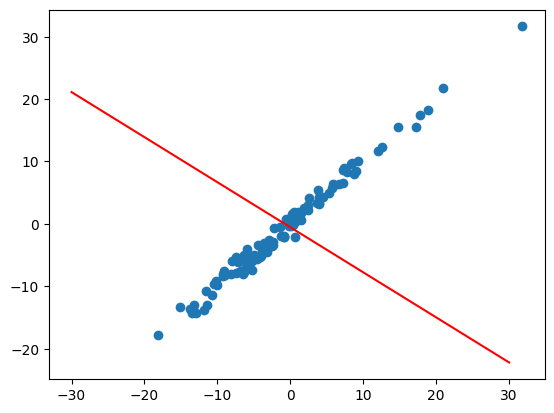

In [91]:
# 학습 전 초기 파라미터
import numpy as np

plt.scatter(X,y)

x1 = np.array([-30, 30])
y1 = x1 * w[0][0].item() + b[0].item()
plt.plot(x1, y1, 'r')
plt.show()

# 학습
1. 손실함수 측정(회귀에서의 손실함수: MSE)
2. 최적화함수 사용(SGD)
3. epoch(100)
4. learning rate(0.001) 학습 얼마나 빨리 시킬건지

In [94]:
import torch.optim as optim

# 최적화함수
# 가중치와 learning rate 쓰기
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# 손실함수
criterion = nn.MSELoss()

# 에폭
epochs = 100

In [95]:
# 손실함수 시각화를 위한
loss_list = []

for epoch in range(epochs):
    # 옵티마이저 초기화
    optimizer.zero_grad() # 기울기 값을 0으로
    # 학습용 데이터 넣어서 모델 예측
    y_pred = model(X)
    # 오차 구하기 criterion(예측, 실제)
    loss = criterion(y_pred, y)
    print(loss)
    loss_list.append(loss.item())

    # 역전파
    loss.backward()
    # 역전파된 가중치값들을 최적화함수에 집어 넣어 -> 이걸로 다시 예측
    optimizer.step()

tensor(316.3094, grad_fn=<MseLossBackward0>)
tensor(278.0415, grad_fn=<MseLossBackward0>)
tensor(244.4228, grad_fn=<MseLossBackward0>)
tensor(214.8882, grad_fn=<MseLossBackward0>)
tensor(188.9418, grad_fn=<MseLossBackward0>)
tensor(166.1476, grad_fn=<MseLossBackward0>)
tensor(146.1224, grad_fn=<MseLossBackward0>)
tensor(128.5300, grad_fn=<MseLossBackward0>)
tensor(113.0749, grad_fn=<MseLossBackward0>)
tensor(99.4971, grad_fn=<MseLossBackward0>)
tensor(87.5690, grad_fn=<MseLossBackward0>)
tensor(77.0897, grad_fn=<MseLossBackward0>)
tensor(67.8834, grad_fn=<MseLossBackward0>)
tensor(59.7956, grad_fn=<MseLossBackward0>)
tensor(52.6901, grad_fn=<MseLossBackward0>)
tensor(46.4478, grad_fn=<MseLossBackward0>)
tensor(40.9637, grad_fn=<MseLossBackward0>)
tensor(36.1457, grad_fn=<MseLossBackward0>)
tensor(31.9130, grad_fn=<MseLossBackward0>)
tensor(28.1944, grad_fn=<MseLossBackward0>)
tensor(24.9275, grad_fn=<MseLossBackward0>)
tensor(22.0573, grad_fn=<MseLossBackward0>)
tensor(19.5357, grad_fn

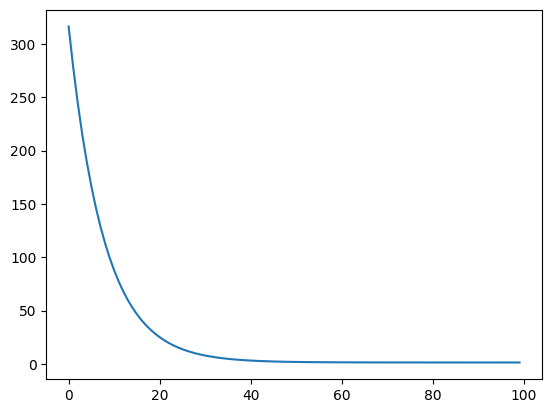

In [96]:
# loss 시각화
plt.plot(range(epochs), loss_list)

In [97]:
list(model.parameters())

[Parameter containing:
 tensor([[1.0018]], requires_grad=True),
 Parameter containing:
 tensor([-0.0493], requires_grad=True)]

In [98]:
w, b = model.parameters()

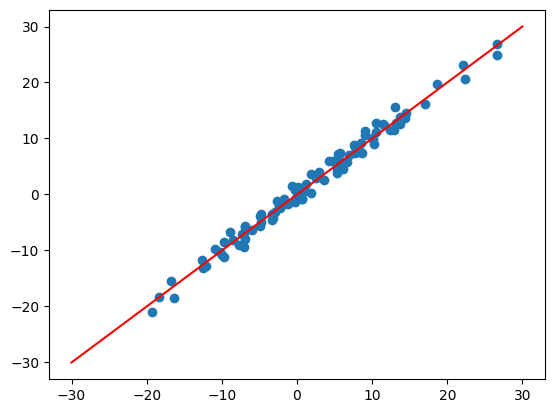

In [99]:
# 학습 후 초기 파라미터
import numpy as np

plt.scatter(X,y)

x1 = np.array([-30, 30])
y1 = x1 * w[0][0].item() + b[0].item()
plt.plot(x1, y1, 'r')
plt.show()

In [101]:
model(torch.tensor([-5.,]))

tensor([-5.0583], grad_fn=<ViewBackward0>)

# 모델 저장 방법
1. 모델 통째로 저장 (바로 쓸 수 있으나, 용량이 커진다)
2. 모델 가중치만 저장 (용량이 작아지지만, 모델의 구조를 알고 있어야 한다)

In [105]:
# 통째로 저장
torch.save(model, 'model1.pth')

In [107]:
# 모델 가중치만 저장
# 모델 이름, 파일 이름 경로
torch.save(model.state_dict(), 'model2.pth')

In [104]:
model(torch.tensor([0.1]))

tensor([0.0508], grad_fn=<ViewBackward0>)

# 모델 불러오기

In [64]:
# 모델 구조 정의
class LRModel(nn.Module):
    def __init__(self):
        super(LRModel, self).__init__()

        self.fc = nn.Linear(1,1)  # 1개 값을 넣으면 1개가 나온다
        
    def forward(self, x):
        x= self.fc(x)
        return x

In [68]:
# 통째로 저장한 모델 불러오기
model_all = torch.load('model1.pth')
model_all(torch.tensor([0.1]))

tensor([0.0508], grad_fn=<ViewBackward0>)

In [69]:
# 가중치만 저장한 모델 불러오기
model_param = LRModel()
model_param.load_state_dict(torch.load('model2.pth'))
model_param(torch.tensor([0.1]))

tensor([0.0508], grad_fn=<ViewBackward0>)